# P2 - Avaliação final de Ciência dos Dados

___

# Nome: <font color=red>**G A B A R I T O**</font>

___

Avisos:

* O dever de salvar a prova é do aluno. Salve sempre
* Evite repetir nomes de variáveis entre as questões para evitar interferências não planejadas

**Só serão consideradas entregues provas submetidas via Blackboard ao final e que entregaram a folha de rosto**


___

In [1]:
# Imports que podem ser úteis

import pandas as pd;
import seaborn as sns # evite fazer pairplot! Estoura a memória
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, binom, t, norm, probplot, scoreatpercentile, percentileofscore
%matplotlib inline

___

## Questão 1 - Teste de Hipóteses
(3,0 pontos)

<img src="coywolf.png" alt="Fonte: https://www.youtube.com/watch?v=nNWCDpW6T4c" width="200">


Você é o biólogo chefe de uma reserva ambiental que tem, entre outros animais, lobos cinzentos. 

De acordo com as regulações de seu país, os animais da fauna nativa original do país devem ser protegidos.

Sabe-se que em regiões próximas à sua área os lobos têm cruzado com coiotes. O cruzamento entre lobo e  coiote gera um animal híbrido chamado  *coywolf*. Um *coywolf* se adapta melhor perto de populações humanas, mas não é da fauna original, portanto não tem proteção garantida por lei. 


Os lobos são maiores e mais pesados que os *coywolves*, sabe-se que antes da suspeita de hibridização a população de lobos de sua reserva era normalmente distribuída com peso médio de $37.5 kg$ e desvio padrão de $14.0$.

Você pesou alguns animais escolhidos aleatoriamente e chegou aos seguintes valores.

In [2]:
animais = [16.0, 41.2, 41.7, 30.1, 13.3, 22.3, 32.5, 33.4, 25.6, 18.8, 31.0, 24.5]

Olhando para essa lista de pesos, você suspeita que os animais estão leves demais em relação ao que se conhecia anteriormente. Será que houve hibridização? Deseja-se saber se a média de peso dos lobos da reserva diminuiu, ou seja: se há indicios de ter realmente ocorrido hibridização. Neste exercício você deverá montar e concluir o teste de hipóteses com um nível de significância de $2\%$ seguindo as etapas:

**a.** Escreva a hipótese nula e a hipótese alternativa (pode ser em português, sem notação matemática) **(0,75)**

Símbolos úteis (se precisar e quiser usar) $H_0$ $H_1$ $\mu$ $>$ $<$ $\leq$ $\geq$ $\neq$

**R. explicação aqui**: 

Hipótese nula: o peso médio não mudou $\rightarrow H_0$ : $\mu$ = 37,5 Kg. 

Hipótese alternativa: O peso médio diminuiu devido à uma hibridização entre lobos e coiotes $\rightarrow H_1$: $\mu$ $<$ 37,5


**b.** Calcule os valores necessários e conclua o teste. Deixe claro em que se baseou sua conclusão e o que decidiu sobre as hipóteses **(1,5)**

In [3]:
#Se for fazer teste assumindo que desvio padrão manteve o mesmo, independente da ocorrência da hibridização

n=len(animais)

x_=37.5
x_obs=np.mean(animais)

desvio_padrao_=14/n**0.5

prob=norm.cdf(x_obs, loc=x_, scale=desvio_padrao_)
print("Valor p:",prob)

valor_critico=norm.ppf(0.02, loc=x_, scale=desvio_padrao_)
print("O valor crítico é:",valor_critico)
print("O peso médio da amostra é:",x_obs)

Valor p: 0.006829460735350355
O valor crítico é: 29.199872595191714
O peso médio da amostra é: 27.533333333333335



**R.: conclusão aqui:** 

** Assumindo que \sigma não alterou**

Como o valor médio da amostra é de 27,53 Kg e é menor do que valor critico 29,20 (teste unicaudal a esquerda), então há evidências para rejeitar H0.
Ou como valor p < $\alpha=2%$ adotado nesta questão, então há evidências para rejeitar H0.

Assim há evidências de hibridização a população de lobos de sua reserva assumindo nível de significância de 2%.


In [4]:
#Se for fazer teste assumindo que desvio padrão pode ter alterado com ocorrência da hibridização

n=len(animais)

x_=37.5
x_obs=np.mean(animais)
s_obs=np.std(animais, ddof=1)

t_obs=(x_obs-x_)/(s_obs/n**0.5)

prob=t.cdf(t_obs, df=n-1)
print("Valor p:",prob)

valor_critico=t.ppf(0.02, df=n-1)
print("O valor crítico é:",valor_critico)
print("O t_obs amostra é:",t_obs)

Valor p: 0.001521846597553928
O valor crítico é: -2.3281398334595726
O t_obs amostra é: -3.7806408396253133



**R.: conclusão aqui:** 

** Assumindo que \sigma pode ter alterado com hibridização**

Como o t_obs é de -3,78 e é menor do que valor critico -2,33 (teste unicaudal a esquerda), então há evidências para rejeitar H0.
Ou como valor p < $\alpha=2%$ adotado nesta questão, então há evidências para rejeitar H0.

Assim há evidências de hibridização a população de lobos de sua reserva assumindo nível de significância de 2%.


**c.** No caso particular da hibridização dos lobos da reserva, interprete o que significa cometer um erro do tipo 1. Também indique qual é a probabilidade de cometer um erro do tipo 1 neste problema **(0,75)**

**R. explicação aqui**: 

Denifinição do erro tipo 1: concluir pela rejeição da hipótese nula quando esta é verdadeira

Em termos do problema: concluir que houve hibridização entre lobos e coiotes, quando na verdade isso não ocorreu.

A probabilidade de ocorrer um erro do tipo 1 foi fixado em 2%.

___

## Questão 2 - Regressão
(3,0 pontos)

A base a seguir tem as notas dadas por usuários a filmes (coluna `Ratings`) relacionada com diversos dados de redes sociais, faturamento e exibição.


In [5]:
movies = pd.read_excel("movies.xlsx")
movies.head(2)

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
0,13 Sins,2014,6.3,8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0
1,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0


Pede-se:

**a.** Faça uma regressão linear que tenta prever `Ratings` em função de `Gross` e `Likes`  que são, respectivamente faturamento e curtidas em mídias sociais **(0,5)**

In [6]:
# Vamos usar a função fornecida na aula de regressãi

def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

variaveis_item_a = ['Gross', 
       'Likes']

x_2a = movies.loc[:, variaveis_item_a]
y_2a = movies.Ratings

reg_2a = regress(x_2a, y_2a)
reg_2a.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Ratings   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     15.31
Date:                Thu, 30 May 2019   Prob (F-statistic):           5.75e-07
Time:                        11:28:48   Log-Likelihood:                -310.11
No. Observations:                 231   AIC:                             626.2
Df Residuals:                     228   BIC:                             636.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1696      0.080     76.715      0.000       6.011       6.328
Gross       3.761e-09   6.96e-10      5.405      0.000    2.39e-09    5.13e-09
Likes       1.251e-06   2.15e-06      0.583      0.560   -2.98e-06    5.48e-06
==============================================================================
Omnibus:                        6.669   Durbin-Watson:                   1.687
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.410
Skew:                          -0.393   Prob(JB):                       0.0406
Kurtosis:                       3.219   Cond. No.                     1.47e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**b.** Mantenha apenas a variável explicativa que for mais significante dentre `Gross` e `Likes`. Explique como descobriu quem é a mais significante e refaça a regressão prevendo `Ratings` em função da variável que sobrou. **(1,0)**

**R.:** Os valores-p (indicados por **P>|t|**) testam a hipótese nula daquele coeficiente $\beta_i = 0$ . Para o caso do $\beta_i$ ser **Likes**, não rejeitamos a hipótese nula. Portanto **Likes** é o  coeficiente  menos significante.

Vamos refazer somente com **Ratings** em função de **Gross**


In [7]:
variaveis_item_b = ['Gross']

x_2b = movies.loc[:, variaveis_item_b]
y_2b = movies.Ratings

reg_2b = regress(x_2b, y_2a)
reg_2b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Ratings   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     30.37
Date:                Thu, 30 May 2019   Prob (F-statistic):           9.57e-08
Time:                        11:28:48   Log-Likelihood:                -310.28
No. Observations:                 231   AIC:                             624.6
Df Residuals:                     229   BIC:                             631.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1825      0.077     80.067      0.000       6.030       6.335
Gross       3.806e-09   6.91e-10      5.511      0.000    2.45e-09    5.17e-09
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                6.009
Skew:                          -0.382   Prob(JB):                       0.0496
Kurtosis:                       3.202   Cond. No.                     1.41e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**c.** Escreva a equação encontrada no item **b** **(0,5)**

**R.:** Podemos escrever a equação da seguinte forma:

$\hat{Ratings} = 6.1825 + 3.806.10^9 Gross$

**d.** Faça o plot da regressão que encontrou no item **b** sobre o gráfico de dispersão.  Discorra sobre a qualidade do regressão levando em conta a variação que foi explicada e o que a inspeção visual da dispersão permite dizer sobre a distribuição dos resíduos **(1,0)**

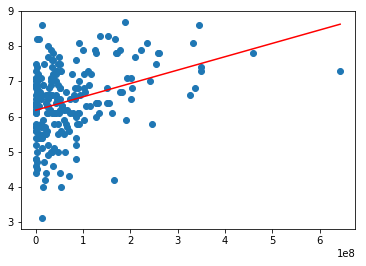

In [8]:
# Função útil para aplicar a equação
def eq_b(Gross):
    return 6.1825 + 3.806e-09*Gross

# Vamos fazer uma pequena exploratória para saber a faixa de valores

x_min = movies.Gross.min()
x_max = movies.Gross.max()

x_2d = np.linspace(x_min, x_max, 300)
y_2d = eq_b(x_2d)

plt.scatter(movies.Gross, movies.Ratings)
plt.plot(x_2d, y_2d, color="r")

**R.:** Os resíduos não parecem ser distribuídos de acordo com uma normal de mesma variância ao longo da reta de regressão

___

## Questão 3  - Bootstrap
(2,5 pontos)


O edital de um processo seletivo informa o seguinte:

> Nota de corte:
>
> A nota de corte será dada pela média do desempenho dos candidatos somado a um desvio padrão. 

Um candidato deseja conhecer a possível nota de corte do exame a partir de uma amostra de notas do ano anterior:

In [9]:
amostra = [
    55.45, 58.89, 22.1 , 26.74, 19.95, 80.3 , 12.94, 37.  , 41.26,
    12.94, 29.59, 67.83, 40.73, 26.24,  9.85, 27.98, 86.64, 74.32,
    33.06, 73.84, 82.11, 91.64, 65.67, 70.35, 36.56, 21.76, 78.93,
    64.94,  8.06, 22.  , 25.7 , 21.63, 18.42, 81.27, 22.88, 15.57,
    22.34, 72.21, 72.84, 20.44, 32.98, 23.82, 32.79, 85.75, 67.86,
    64.74, 22.46,  9.38, 31.47, 26.12, 81.28, 94.36, 17.35, 37.58,
    81.39, 14.86, 70.15, 80.94, 79.5 , 28.27, 20.95, 61.29,  7.9 ,
    87.91, 18.95,  9.05, 29.85,  5.23, 40.63, 45.06, 79.99, 98.71,
    14.79, 75.91, 33.44, 30.38, 37.33,  6.98, 19.63, 50.16, 72.37,
    71.36,  9.37, 79.11, 19.54, 41.61, 59.1 , 94.97, 47.72, 72.16,
    10.3 , 58.09, 66.99, 15.42, 29.8 , 66.42, 91.09,  8.49, 65.64,
    80.85
]
print(len(amostra))

100


**a.** Verifique se esta amostra segue uma distribuição normal. Um intervalo de confiança *t* seria adequado neste caso? **(0,5)**

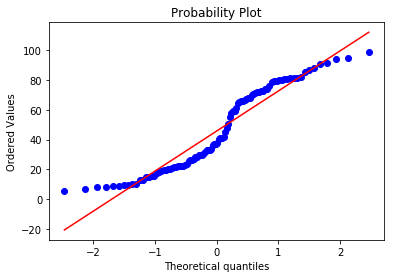

In [10]:
# Código para verificar se amostra segue uma normal
probplot(amostra, dist="norm", plot=plt);

**R:** Pelo probplot acima é possível ver que não há aderência à uma distribuição normal (cerca de 20% de nas caudas e 10% no centro). Para mitigar as desconfianças, dado que há 100 dados na amostra, vamos observar o histograma da amostra:

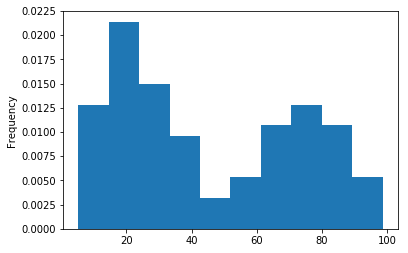

In [11]:
pd.Series(amostra).plot.hist(density=True);

Novamente, a amostra está longe de ser uma normal e portanto um intervalo t NÃO seria adequado.

**b.** Faça uma função ``nota_de_corte(amostra)`` que recebe uma única amostra e calcula a nota de corte para esta amostra. Use esta função para calcular a nota de corte da amostra dada acima. **(0,5)**

In [12]:
def nota_de_corte(amostra):
    return np.mean(amostra) + np.std(amostra, ddof=1)

In [13]:
nota_de_corte(amostra) # chama a função acima

73.35891504484945

**c.** Usando a função `nota_de_corte(amostra)` que escreveu acima, calcule o intervalo bootstrap das notas de corte com $\gamma = 0,95$. **(1,5)**

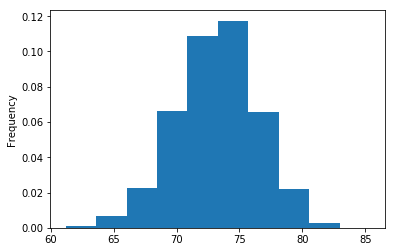

In [14]:
B = 10000
NC = []
for i in range(B):
    subamostra = np.random.choice(amostra, size=len(amostra), replace=True)
    NC.append(nota_de_corte(subamostra))

pd.Series(NC).plot.hist(density=True);

In [15]:
#Percentis:
gamma = 0.95
perc = (1 - gamma) / 2
print("Intervalo de confiança: {0} - {1}".format(np.percentile(NC, perc*100), np.percentile(NC, (1-perc)*100)))

Intervalo de confiança: 66.4923712219838 - 79.27321173013699


___

## Questão 4 - Conceitual de Machine Learning
(1,5 pontos)

Um estagiário recebeu a tarefa de montar um modelo preditivo de nível de glicose no sangue de pacientes com diabetes à partir de um conjunto de 10 atributos dos pacientes. 

O resto desta questão é uma representação do processo mental do estagiário.


**Ao final da questão aponte os erros explicando o que está errado ou sugerindo alternativas.**

In [16]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)

"Ok, sempre me dizem que devo explorar os dados antes de montar o modelo, então vou checar o tamanho do dataset"

In [17]:
X.shape

(442, 10)

In [18]:
y.shape

(442,)

"Perfeito, isso basta! Os tamanhos batem! Depois eu pergunto para o chefe o que são os atributos mesmo."

"Esse é um problema de clustering, onde cada cluster é um $\hat{\beta}_i$ diferente. Outro nome para isso é regressão. Meu modelo vai então ser uma regressão linear:"

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

"Agora tenho que testar o modelo. Uma boa métrica para regressão é o valor de $R^2$"

In [20]:
from sklearn.metrics import r2_score
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
r2

0.5177494254132934

"Legal, parece que o erro quadrático médio é $51\%$. Agora vou impressionar meu chefe mostrando também os resultados de um outro método de clustering, a regressão logística!"

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

C:\Users\Kelly\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kelly\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
r2

0.18666097720661945

"Que ótimo, o $R^2$ diminuiu, o que significa que o segundo modelo é ainda melhor! Mal posso esperar para mostrar como sou bom para o chefe!" 

**Responda** abaixo mencionando **pelo menos 3 erros** do estagiário e como faria para corrigi-los. **(0,5)** cada erro válido.

**R.:**


